# 지하철 시간대별 이용 현황
- max : 최대값 계산 
- idxmax : 최대값 인덱스 계산

In [32]:
import pandas as pd
import	matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("subway.xls", sheet_name="지하철 시간대별 이용현황", header=[0, 1])
df.head()

사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2023-12                1호선                150                서울역   
1            2023-12                1호선                151                 시청   
2            2023-12                1호선                152                 종각   
3            2023-12                1호선                153               종로3가   
4            2023-12                1호선                154               종로5가   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               700  35             7,812  8,436            12,190  50,415   
1                73   1             2,208  4,356             3,731  21,903   
2               167   1             4,280  4,932             4,329  25,201   
3               230  16             4,174  2,538             3,621  11,378   
4                40   2             1,862  3,023             3,027  14,468   

   ... 23:00:00~23:59:59 00:00:00~00:59:59        01:00:00~01:59:59         \
   ...                하차                승차     하차                승차     하차   
0  ...            15,733             3,170  4,088               140  1,884   
1  ...             5,965             4,290  1,523             1,053    383   
2  ...             5,317             2,621  1,402             1,638    241   
3  ...             7,655             7,239  2,844               917    422   
4  ...             3,905               627  1,275               104    152   

  02:00:00~02:59:59      03:00:00~03:59:59                    작업일시  
                 승차   하차                승차 하차  Unnamed: 52_level_1  
0                 0  283                 0  0  2024-01-03 09:18:08  
1                 0   10                 0  0  2024-01-03 09:18:08  
2                 1    1                 0  0  2024-01-03 09:18:08  
3                 0    1                 0  0  2024-01-03 09:18:08  
4                 0    0                 0  0  2024-01-03 09:18:08  

[5 rows x 53 columns]

In [3]:
df.columns

MultiIndex([(              '사용월',  'Unnamed: 0_level_1'),
            (              '호선명',  'Unnamed: 1_level_1'),
            (              '역ID',  'Unnamed: 2_level_1'),
            (             '지하철역',  'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                  '승차'),
            ('04:00:00~04:59:59',                  '하차'),
            ('05:00:00~05:59:59',                  '승차'),
            ('05:00:00~05:59:59',                  '하차'),
            ('06:00:00~06:59:59',                  '승차'),
            ('06:00:00~06:59:59',                  '하차'),
            ('07:00:00~07:59:59',                  '승차'),
            ('07:00:00~07:59:59',                  '하차'),
            ('08:00:00~08:59:59',                  '승차'),
            ('08:00:00~08:59:59',                  '하차'),
            ('09:00:00~09:59:59',                  '승차'),
            ('09:00:00~09:59:59',                  '하차'),
            ('10:00:00~10:59:59',                  '승차'),
            ('

In [4]:
df[('호선명',  'Unnamed: 1_level_1')]

0      1호선
1      1호선
2      1호선
3      1호선
4      1호선
      ... 
616    신림선
617    신림선
618    신림선
619    신림선
620    신림선
Name: (호선명, Unnamed: 1_level_1), Length: 621, dtype: object

In [22]:
commute_time_df = df.iloc[:, [1, 3, 10, 12, 14]]
commute_time_df.head()

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,"37,075","68,020","67,218"
1,1호선,시청,"7,341","9,896","13,154"
2,1호선,종각,"6,459","10,114","12,834"
3,1호선,종로3가,"5,454","8,475","12,940"
4,1호선,종로5가,"5,753","9,099","13,585"


In [23]:
# 데이터 타입 확인
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                    object
08:00:00~08:59:59  승차                    object
09:00:00~09:59:59  승차                    object
dtype: object

In [34]:
# 천단위 콤마 제거
commute_time_df = commute_time_df.copy()
commute_time_df.loc[:,('07:00:00~07:59:59','승차')]	=	commute_time_df.loc[:,('07:00:00~07:59:59', '승차')].apply(lambda x : x.replace(',',''))
commute_time_df.loc[:,('08:00:00~08:59:59','승차')]	=	commute_time_df.loc[:,('08:00:00~08:59:59', '승차')].apply(lambda x : x.replace(',',''))
commute_time_df.loc[:,('09:00:00~09:59:59','승차')]	=	commute_time_df.loc[:,('09:00:00~09:59:59', '승차')].apply(lambda x : x.replace(',',''))
commute_time_df

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,37075,68020,67218
1,1호선,시청,7341,9896,13154
2,1호선,종각,6459,10114,12834
3,1호선,종로3가,5454,8475,12940
4,1호선,종로5가,5753,9099,13585
...,...,...,...,...,...
616,신림선,당곡,12279,18186,12338
617,신림선,신림,3998,6445,4063
618,신림선,서원,12908,18897,12105


In [17]:
# 데이터 타입 변경 
commute_time_df =	commute_time_df.astype({('07:00:00~07:59:59',	'승차'):'int64'})
commute_time_df =	commute_time_df.astype({('08:00:00~08:59:59',	'승차'):'int64'})
commute_time_df =	commute_time_df.astype({('09:00:00~09:59:59',	'승차'):'int64'})
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object

In [18]:
# 각 행의 승차 인원 수 합 계산 
row_sum_df = commute_time_df.sum(axis=1, numeric_only=True)
passenger_number_list =	row_sum_df.to_list()
row_sum_df

0      172313
1       30391
2       29407
3       26869
4       28437
        ...  
616     42803
617     14506
618     43910
619     96672
620     14947
Length: 621, dtype: int64

In [28]:
max_number =	row_sum_df.max(axis=0)	#	해당 열에서 최대값 찾기
max_number

576994

In [30]:
max_index =	row_sum_df.idxmax() # 최대값 인덱스 계산 
max_line,	max_station =	df.iloc[max_index,	[1,	3]]	#최대값의 [1]:	호선,[3]:	지하철역명
print('출근 시간대 최대 승차 인원역:	{0}	{1}	{2:,}명'.format(max_line,	max_station, max_number))

출근 시간대 최대 승차 인원역:	2호선	신림	576,994명


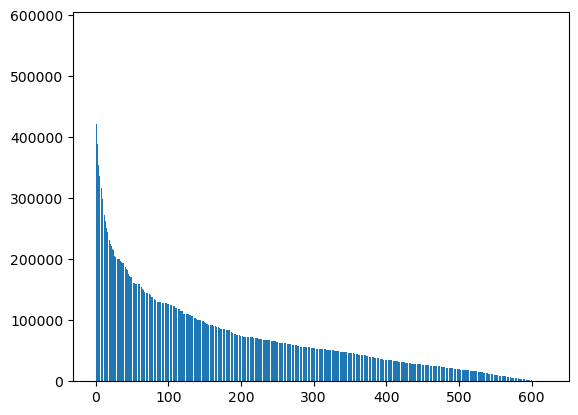

In [33]:
# 차트 그리기 
passenger_number_list.sort(reverse = True)
plt.figure(dpi=100)
plt.bar(range(len(passenger_number_list)), passenger_number_list)
plt.show()